# UCI Math 10, Fall 2021

# Worksheet: Image processing using NumPy and Pillow

To get full credit on this worksheet, the worksheet needs to be well-organized, containing all these cells it started with, and only what is needed for you to answer the questions.

**Suggestion**.  Make a copy of this notebook, do your work in the copy, and then put your final answers in the original.

<p style="font-size:20px; color:blue; font-weight:bold">Question 0:</p>

Name: 

UCI ID: 

## Introduction

In this worksheet, we will divide this image into 26 smaller images, with one letter in each small image.

Using NumPy arrays, we will
* divide the image into four rows by identifying where the gaps are between the rows;
* then divide each of those rows into columns, by identifying where the gaps are between the letters.  

<img style="float:left" src="../images/alphabet.png" width=400/>

## Import the libraries we will use

In [140]:
from PIL import Image
import numpy as np
import string

## Define some helper functions

<p style="font-size:20px; color:blue; font-weight:bold">Question 1:</p>

Write a function *make_pairs* which takes as input a list of even length my_list, say my_list = $[a_0,a_1,\ldots,a_{2k+1}]$, and as output returns a list of pairs $[(a_1, a_2), (a_3, a_4), \ldots, (a_{2k-1},a_{2k})]$.  (Notice that we don't include the original endpoints $a_0$ and $a_{2k+1}$.)

(Don't worry about checking that the input list is even length; the point of saying it's even length is just so you know what kind of input to expect whent he function is called.  In general in Math 10, unless we explicitly say that for example your function should raise an error if a condition is not met, then you don't have to worry about checking that condition explicitly.)

In [71]:
def make_pairs(my_list):
    
    ...
    
    return ...

Here are some examples to check your answer.  These examples serve two purposes.  First: they help you ensure your definition of make_pairs is right.  Second and probably more important: understanding these examples will help you practice with some important Python concepts.

In [66]:
# Example:
make_pairs([1,2,3,4,5,6])
# Expected answer [(2, 3), (4, 5)]

[(2, 3), (4, 5)]

In [74]:
# Example:
type(make_pairs([1,2,3,4,5,6]))
# Expected answer list

list

In [75]:
# Example:
check_list = make_pairs([1,2,3,4,5,6])
type(check_list[0])
# Expected answer tuple

tuple

In [69]:
# Example:
make_pairs(list(range(10)))
# Expected answer [(1, 2), (3, 4), (5, 6), (7, 8)]

[(1, 2), (3, 4), (5, 6), (7, 8)]

In [70]:
# Example:
make_pairs([0,1]*5)
# Expected answer [(1, 0), (1, 0), (1, 0), (1, 0)]

[(1, 0), (1, 0), (1, 0), (1, 0)]

<p style="font-size:20px; color:blue; font-weight:bold">Question 2:</p>

Write a function endpoints(my_list) which takes as input a list of integers my_list, and as output returns the same list, but where an integer n is removed from my_list if both n-1 and n+1 are in my_list.

In [2]:
def endpoints(my_list):
    return [x for x in my_list if (x-1 not in my_list) or (x+1 not in my_list)]

In [3]:
# Example:
endpoints(range(10))
# Expected answer [0, 9]

[0, 9]

In [6]:
# Example:
endpoints(range(0,10,2))
# Expected answer [0, 2, 4, 6, 8]

[0, 2, 4, 6, 8]

In [7]:
# Example:
endpoints(list(range(5)) + list(range(12,20)))
# Expected answer [0, 4, 12, 19]

[0, 4, 12, 19]

## Import the image and convert it to a NumPy array.

<p style="font-size:20px; color:blue; font-weight:bold">Question 3:</p>

The image at the top of this notebook was included using a Markdown cell (the actual text used in that specific markdown is html code).  Double-click on the cell to find the file-location; it will come after src= in the HTML.  Once you have the file location, read it in to our notebook.

In [5]:
im = Image.open(...) # Replace ... with the file location.  Make the file location a string by wrapping it in quotation marks.

NameError: name 'Image' is not defined

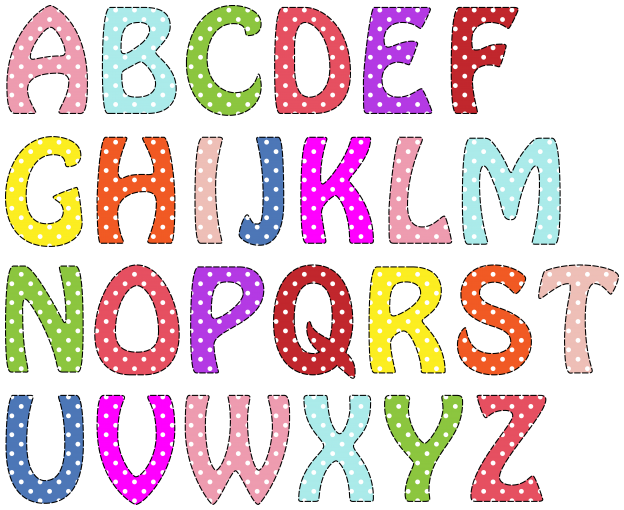

In [87]:
# Example
im
# If you evaluate this cell, it should display the image.

In [80]:
A = np.asarray(im)

In [82]:
# Example:
A.shape
# Expected answer: (510, 624, 4)

(510, 624, 4)

In [86]:
# Example:
A[300,200] # This is the RGBA value of the pixel at position (300,200).
# Expected answer: array([237, 209, 248, 255], dtype=uint8)

array([237, 209, 248, 255], dtype=uint8)

In [89]:
# Example:
A[120,:,:].max()
# Expected answer: 0
# Interpretation: The only pixel RGBA values occurring in the 120-th row are [0,0,0,0]

0

In [90]:
# Example:
A[300,:,:].max()
# Expected answer: 255

255

## Identify where the rows of letters begin and where they end

<p style="font-size:20px; color:blue; font-weight:bold">Question 4:</p>

Make a list called zero_rows containing the row numbers which contain only [0,0,0,0] pixels.  For example, 120 should be in this list, but 300 should not be in this list.

In [108]:
# Define zero_rows here.  You can use as many lines of code as you want.
# This is probably the most difficult question.  Look at the above .max() examples for inspiration.
# If you need a hint, we divide each row into columns below, and the procedure is similar, 
# but the method we use to divide into columns is probably fancier than what you need,
# so you should try to solve this on your own first.

In [109]:
# Example:
120 in zero_rows
# Expected answer: True

True

In [110]:
# Example:
300 in zero_rows
# Expected answer: False

False

In [94]:
# Example:
len(zero_rows)
# Expected answer: 62

62

In [96]:
# Example:
zero_rows[20]
# Expected answer: 131

131

In [43]:
# Using the function you defined at the top of this notebook.
row_boundaries = endpoints(zero_rows)

In [97]:
# Example
row_boundaries
# Expected answer: [0, 4, 116, 135, 247, 263, 379, 393, 505, 509]

[0, 4, 116, 135, 247, 263, 379, 393, 505, 509]

In [99]:
pairs = make_pairs(row_boundaries)

In [101]:
# Example:
pairs[2]
# Expected answer: (263, 379)
# Interpretation: This means that the second row of letters NOPQRST (remember Python numbering starts at 0)
# lies between the 263rd and 379th rows of pixels.

(263, 379)

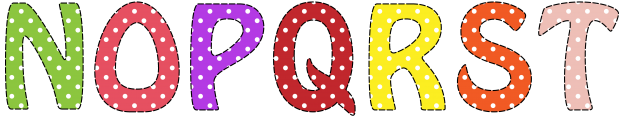

In [103]:
# Example: 
Image.fromarray(A[pairs[2][0]:pairs[2][1]])
# Expected output: This should display the row of letters NOPQRST.
# Advice: Stare at this code until you understand what it's doing, piece by piece.

## Divide each row into columns

Row 0:


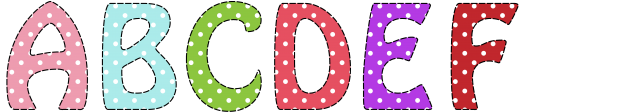

Row 1:


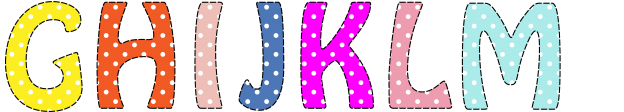

Row 2:


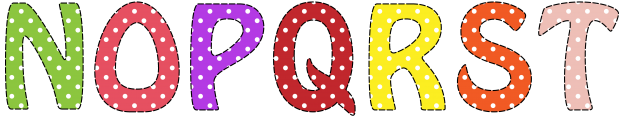

Row 3:


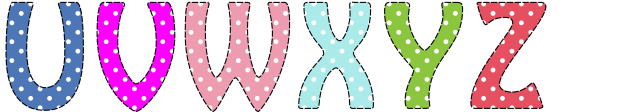

In [107]:
# We can get each row of letters as follows.
for i in range(4):
    print(f"Row {i}:")
    A_row = A[pairs[i][0]:pairs[i][1]]
    display(Image.fromarray(A_row))

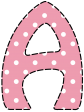

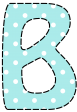

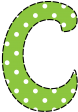

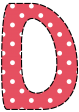

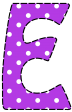

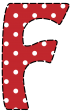

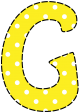

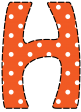

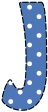

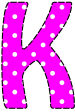

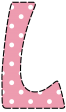

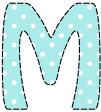

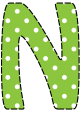

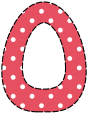

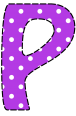

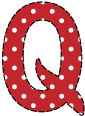

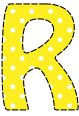

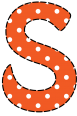

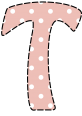

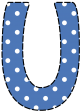

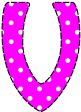

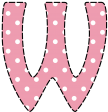

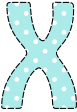

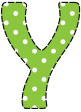

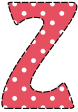

In [114]:
# For each row, we can find the individual letters as follows.
for i in range(4):
    A_row = A[pairs[i][0]:pairs[i][1]]
    width = A_row.shape[1]
    zero_columns = [j for j in range(width) if A_row[:,j,:].max() == 0]
    end_columns = make_pairs(endpoints(zero_columns))
    for col_pair in end_columns:
        display(Image.fromarray(A_row[:,col_pair[0]:col_pair[1],:]))

<p style="font-size:20px; color:blue; font-weight:bold">Question 5:</p>

Adapt the previous cell so that, instead of displaying the letters, we put the corresponding NumPy arrays into a list called array_list.

In [118]:
array_list = []
for i in range(4):
    A_row = A[pairs[i][0]:pairs[i][1]]
    width = A_row.shape[1]
    zero_columns = [j for j in range(width) if A_row[:,j,:].max() == 0]
    end_columns = make_pairs(endpoints(zero_columns))
    for col_pair in end_columns:
        array_list.append(???) # Replace ??? with the correct NumPy array (not with the image)

In [123]:
# Example:
len(array_list)
# Expected answer: 26

26

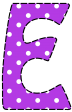

In [122]:
# Example:
Image.fromarray(array_list[4])
# This should display the letter "E"

## Making a dictionary from strings to images

In [124]:
letters = string.ascii_lowercase

In [125]:
letters[4]

'e'

In [131]:
# Example of making a dictionary that has numbers as keys and strings as values:
number_dict = {}
for i in range(26):
    number_dict[i] = letters[i]

In [132]:
number_dict

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z'}

In [133]:
# The same dictionary, made using dictionary comprehension:
{i: letters[i] for i in range(26)}

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z'}

<p style="font-size:20px; color:blue; font-weight:bold">Question 6:</p>

Make a dictionary image_dict that has strings for keys and has the corresponding images as values.

In [ ]:
??? # Fill in this code to define image_dict

In [4]:
# Example
from IPython.display import clear_output
import time
for a in "christopherdavis":
    clear_output(wait=True)
    display(image_dict[a])
    time.sleep(0.4)
# If image_dict is defined correctly, this should display all the letters in my name, one at a time, when you run it.
# After it is finished running, all you will see is the final letter "S".

NameError: name 'image_dict' is not defined

<p style="font-size:20px; color:blue; font-weight:bold">Question 7:</p>

If in the previous cell, we replace "christopherdavis" with "christopher davis" or "ChristopherDavis", we get an error.  Explain why.

Put your answer here, in a Markdown cell.

## Summary question

<p style="font-size:20px; color:blue; font-weight:bold">Question 8:</p>

Would the same procedure have worked if we had tried to split into columns first, and then split each column into rows?  No; explain why not in the following markdown cell.

<img style="float:left" src="../images/alphabet.png" width=200/>

Put your answer here, in a Markdown cell.

## References
The original source of the image is the following, but I have changed the image slightly by adding padding around it, so you cannot use the original source to complete this assignment: [image link](https://www.publicdomainpictures.net/en/view-image.php?image=282779&picture=alphabet-letters-a-z)